In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv("Fuel Consumption.csv")

In [8]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   Model Year   Make              Model Vehicle Class  Engine Size(L)  \
0        2022  Acura                ILX       Compact             2.4   
1        2022  Acura         MDX SH-AWD    SUV: Small             3.5   
2        2022  Acura         RDX SH-AWD    SUV: Small             2.0   
3        2022  Acura  RDX SH-AWD A-SPEC    SUV: Small             2.0   
4        2022  Acura         TLX SH-AWD       Compact             2.0   

   Cylinders Transmission Fuel Type  Fuel Consumption (City (L/100 km)  \
0          4          AM8         Z                                9.9   
1          6         AS10         Z                               12.6   
2          4         AS10         Z                               11.0   
3          4         AS10         Z                               11.3   
4          4         AS10         Z                               11.2   

   Fuel Consumption(Hwy (L/100 km))  Fuel Consumption(Comb (L/100 km))  \
0          

In [9]:
# Step 1: Select features and target variable
# Using 'Engine Size(L)', 'Cylinders', and 'Fuel Consumption(Comb (L/100 km))' as features
# Target variable is 'CO2 Emissions(g/km)' (proxy for fuel consumption)
X = data[['Engine Size(L)', 'Cylinders', 'Fuel Consumption(Comb (L/100 km))']]
y = data['CO2 Emissions(g/km)']

In [10]:
# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Step 3: Train the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Step 4: Make predictions on the test data
y_pred = model.predict(X_test)

In [13]:
# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Model Performance:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Model Performance:
Mean Squared Error: 238.7747241372393
R-squared Score: 0.9403546717480344


In [14]:
# Step 6: Display coefficients of the features
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")


Model Coefficients:
Engine Size(L): 0.7607
Cylinders: 3.0533
Fuel Consumption(Comb (L/100 km)): 19.9133


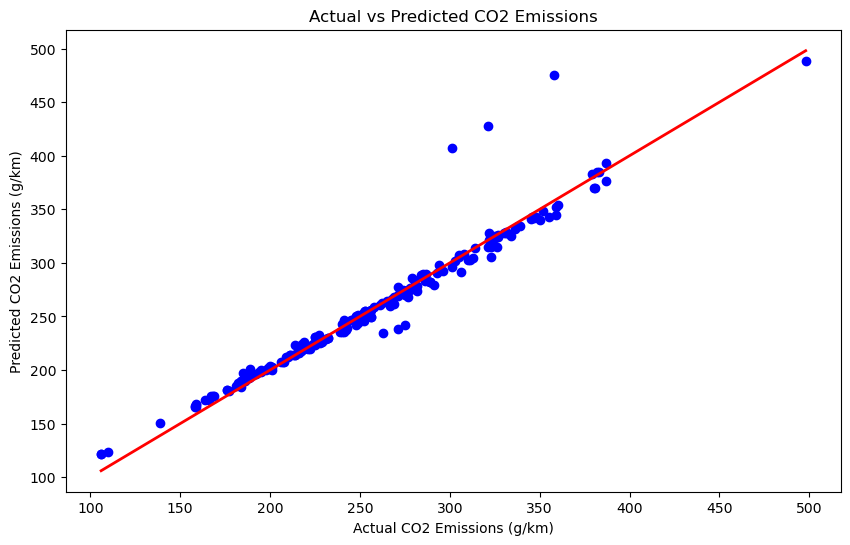

In [15]:
# Optionally, visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual CO2 Emissions (g/km)')
plt.ylabel('Predicted CO2 Emissions (g/km)')
plt.title('Actual vs Predicted CO2 Emissions')
plt.show()

In [16]:
#q2

In [17]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features: Sepal length, Sepal width, Petal length, Petal width
y = iris.target  # Target: Species

In [19]:
# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Step 2: Initialize and train the k-NN classifier
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [21]:
# Step 3: Make predictions on the test set
y_pred = knn.predict(X_test)

In [22]:
# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Performance:")
print(f"Accuracy: {accuracy * 100:.2f}%")

Model Performance:
Accuracy: 100.00%


In [23]:
# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



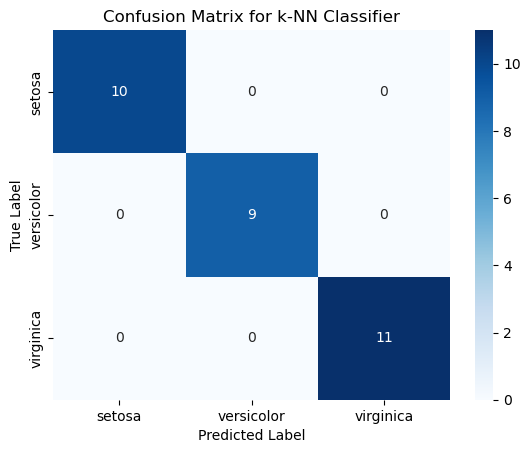

In [24]:
# Step 5: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for k-NN Classifier")
plt.show()